In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import utils
import preprocessing

In [3]:
df,pa = preprocessing.preprocessing_significantes(utils.feature_engineering(utils.get_data()))

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: tiene_alto_valor_adquisitivo, Length: 32561, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, pa, random_state=112)

In [5]:
params = { 'n_estimators':range(100,501,100), 'learning_rate': np.linspace(0.1, 5, 10), 'algorithm': ('SAMME', 'SAMME.R') }
model = AdaBoostClassifier()

In [6]:
gscv = GridSearchCV(model, params, scoring='roc_auc', cv=4, n_jobs=-1, verbose=10)

In [7]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 18

CPU times: user 25 s, sys: 634 ms, total: 25.6 s
Wall time: 1h 2min 22s


In [8]:
gscv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.6444444444444445,
 'n_estimators': 100}

In [9]:
score

0.8967111948288342

In [10]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6182
           1       0.71      0.58      0.64      1959

    accuracy                           0.84      8141
   macro avg       0.79      0.75      0.77      8141
weighted avg       0.83      0.84      0.84      8141



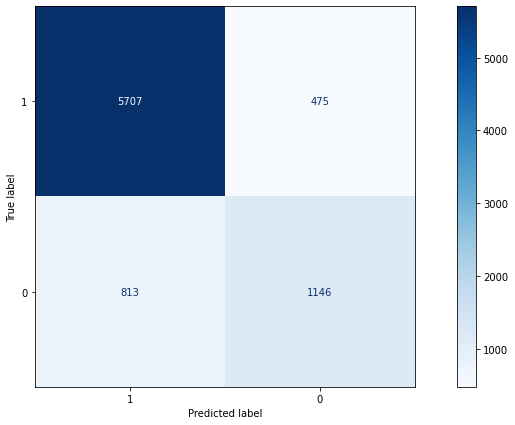

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

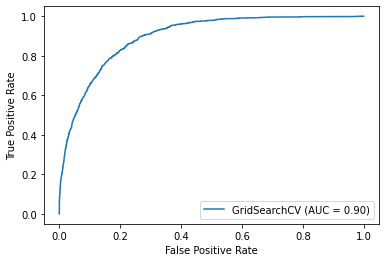

In [12]:
plot_roc_curve(gscv, X_test, y_test)